# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [166]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [167]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [168]:
sinasc_raw.groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [169]:
sinasc = sinasc_raw[['IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'DTNASC', 'GESTACAO', 'GRAVIDEZ', 'ESCMAE', 'IDADEPAI']].copy()
sinasc

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI
0,19,Masculino,9.0,10.0,3685,4,2019-02-19,37 a 41 semanas,Única,8 a 11 anos,26.0
1,29,Feminino,8.0,9.0,3055,4,2019-02-21,37 a 41 semanas,Única,8 a 11 anos,24.0
2,37,Feminino,8.0,10.0,3460,4,2019-02-25,37 a 41 semanas,Única,8 a 11 anos,32.0
3,30,Feminino,9.0,10.0,2982,3,2019-03-20,37 a 41 semanas,Única,12 anos ou mais,24.0
4,30,Feminino,8.0,10.0,3310,4,2019-03-23,37 a 41 semanas,Única,8 a 11 anos,27.0
...,...,...,...,...,...,...,...,...,...,...,...
27023,32,Masculino,8.0,9.0,2110,4,2019-12-13,32 a 36 semanas,Única,12 anos ou mais,35.0
27024,19,Masculino,8.0,9.0,3310,4,2019-10-04,37 a 41 semanas,Única,8 a 11 anos,NaN
27025,24,Masculino,9.0,10.0,3065,4,2019-08-02,37 a 41 semanas,Única,8 a 11 anos,30.0
27026,21,Masculino,8.0,9.0,2352,4,2019-12-23,32 a 36 semanas,Única,8 a 11 anos,24.0


In [170]:
peso_aniv = sinasc[sinasc['DTNASC'] == '2019-02-26'].groupby(['ESCMAE', 'SEXO'])['PESO'].mean()
peso_aniv

ESCMAE           SEXO     
1 a 3 anos       Feminino     2741.000000
12 anos ou mais  Feminino     3542.000000
                 Masculino    3498.692308
4 a 7 anos       Feminino     3119.375000
                 Masculino    3606.666667
8 a 11 anos      Feminino     3394.791667
                 Masculino    3482.500000
Name: PESO, dtype: float64

Text(0, 0.5, 'média do peso')

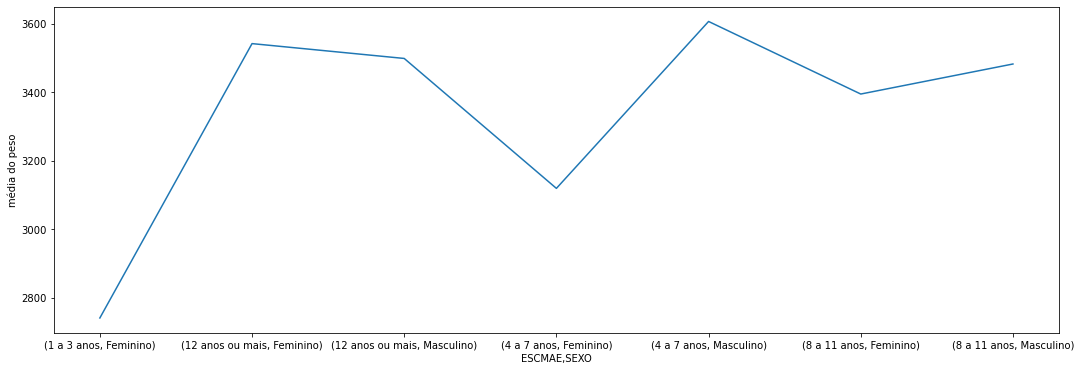

In [171]:
peso_aniv.plot(figsize=[18,6])
plt.ylabel('média do peso')

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [172]:
sinasc_raw.groupby('munResNome')['IDADEMAE'].count().sort_values()

munResNome
Município ignorado - RO         1
Castanheiras                   32
Pimenteiras do Oeste           40
Primavera de Rondônia          43
Parecis                        44
Rio Crespo                     50
São Felipe D'Oeste             54
Teixeirópolis                  64
Cacaulândia                    75
Cabixi                         80
Vale do Paraíso                81
Ministro Andreazza             84
Vale do Anari                  93
Theobroma                      97
Novo Horizonte do Oeste        98
Santa Luzia D'Oeste            99
Nova União                    104
Itapuã do Oeste               109
Governador Jorge Teixeira     112
Corumbiara                    127
Alto Alegre dos Parecis       154
Chupinguaia                   162
Mirante da Serra              164
Campo Novo de Rondônia        166
Seringueiras                  168
Urupá                         170
Monte Negro                   199
Cujubim                       205
Alvorada D'Oeste              205
Col

In [173]:
sinasc_raw[sinasc_raw['munResNome'] == 'Castanheiras'].groupby('munResNome')['IDADEMAE', 'IDADEPAI'].agg([np.median, max, 'min'])

C:\Users\clara\AppData\Local\Temp\ipykernel_17140\2862972388.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc_raw[sinasc_raw['munResNome'] == 'Castanheiras'].groupby('munResNome')['IDADEMAE', 'IDADEPAI'].agg([np.median, max, 'min'])


IDADEMAE         IDADEPAI            
               median max min   median   max   min
munResNome                                        
Castanheiras     27.0  39  17     31.5  43.0  17.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [174]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

In [175]:
sinasc_raw.set_index('DTNASC', inplace=True)

In [176]:
sinasc_raw['MES'] = sinasc_raw.index.month

In [177]:
sinasc_raw[sinasc_raw['MES'] == 3].groupby('munResNome')['IDADEMAE'].count().sort_values(ascending=False)

munResNome
Porto Velho                  744
Ji-Paraná                    188
Vilhena                      148
Ariquemes                    141
Cacoal                       133
Jaru                          80
Guajará-Mirim                 75
Rolim de Moura                69
Ouro Preto do Oeste           67
Pimenta Bueno                 62
Buritis                       59
Nova Mamoré                   53
Espigão D'Oeste               44
Machadinho D'Oeste            44
São Miguel do Guaporé         41
Candeias do Jamari            33
São Francisco do Guaporé      31
Alta Floresta D'Oeste         31
Presidente Médici             29
Costa Marques                 24
Alvorada D'Oeste              22
Alto Paraíso                  22
Monte Negro                   20
Nova Brasilândia D'Oeste      20
Colorado do Oeste             19
Seringueiras                  19
Chupinguaia                   18
Cujubim                       17
Cerejeiras                    16
Urupá                         14

Porto Velho

In [185]:
sinasc_raw[sinasc_raw['munResNome'] == 'Porto Velho'].groupby('munResNome')['QTDFILVIVO'].agg([np.median, max, min])

,median,max,min
munResNome,,,
Porto Velho,1.0,12.0,0.0


In [179]:
sinasc_raw[sinasc_raw['munResNome'] == 'Porto Velho'].groupby('munResNome')['IDADEMAE', 'IDADEPAI'].agg([np.median, max, 'min'])

C:\Users\clara\AppData\Local\Temp\ipykernel_17140\154542241.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc_raw[sinasc_raw['munResNome'] == 'Porto Velho'].groupby('munResNome')['IDADEMAE', 'IDADEPAI'].agg([np.median, max, 'min'])


IDADEMAE         IDADEPAI            
              median max min   median   max   min
munResNome                                       
Porto Velho     26.0  47  12     32.0  65.0  16.0

In [186]:
sinasc_raw['IDADEMAE'].agg(min)

11

In [187]:
sinasc_raw['IDADEPAI'].agg(min)

15.0

Ainda há uma mãe mais nova que a mínima de Porto Velho (12 anos), com apenas 11 anos. Já a idade mínima de pai é 15 anos.

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Mais algumas observações:

In [180]:
idade_mae_gest = sinasc_raw.groupby('GESTACAO')['IDADEMAE'].mean()
idade_mae_gest

GESTACAO
22 a 27 semanas        24.767442
28 a 31 semanas        26.200000
32 a 36 semanas        26.313473
37 a 41 semanas        26.031343
42 semanas e mais      24.861429
Menos de 22 semanas    22.857143
Name: IDADEMAE, dtype: float64

Text(0, 0.5, 'Idade média mães')

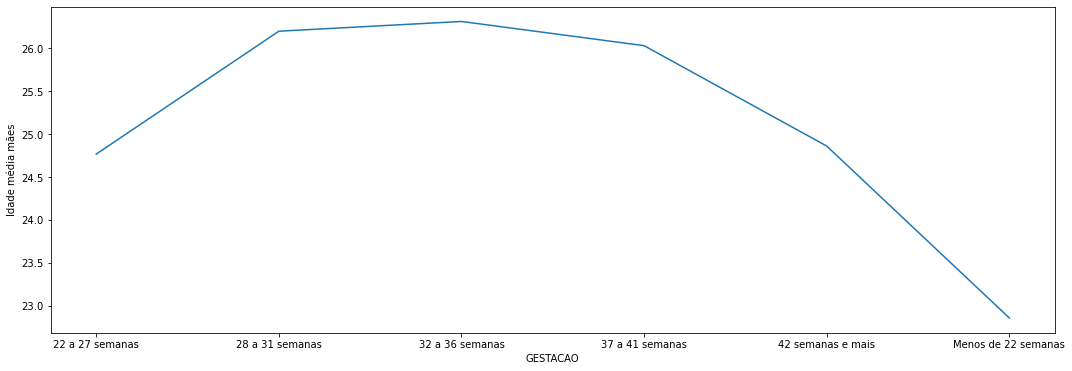

In [181]:
idade_mae_gest.plot(figsize=[18,6])
plt.ylabel('Idade média mães')

A idade média das mulheres que tiveram um período de gestação menor que 22 semanas é a menor entre todas.

In [182]:
sinasc_raw.groupby('GESTACAO')['GRAVIDEZ'].value_counts()
gravidez_gestacao

GESTACAO             GRAVIDEZ       
22 a 27 semanas      Única                 71
                     Dupla                 15
28 a 31 semanas      Única                145
                     Dupla                 20
32 a 36 semanas      Única               2020
                     Dupla                218
                     Tríplice e mais        3
37 a 41 semanas      Única              22322
                     Dupla                210
                     Tríplice e mais        2
42 semanas e mais    Única                698
                     Dupla                  2
Menos de 22 semanas  Única                  7
Name: GRAVIDEZ, dtype: int64

A grávidez "tríplice e mais" aconteceu apenas 5 vezes durante o ano todo. Todas as grávidez com menos de 22 semanas foram de filhos únicos.

In [183]:
sinasc_raw.groupby('RACACORMAE')['QTDFILMORT'].mean()

RACACORMAE
1.0    0.247906
2.0    0.292025
3.0    0.259259
4.0    0.271924
5.0    0.235732
Name: QTDFILMORT, dtype: float64

A média de filhos mortos é maior para mães de cor preta.

In [184]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
DTNASC,,,,,,,,,,,,,,
2019-02-19,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2019-02-21,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2019-02-25,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2019-03-20,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
2019-03-23,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-13,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
2019-10-04,8 a 11 anos,37 a 41 semanas,Única,Vaginal,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
2019-08-02,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
